In [2]:
import numpy as np
from tifffile import imread
import matplotlib.pyplot as plt
import dill as pkl

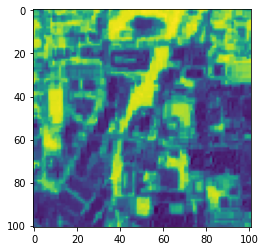

In [21]:
x, y, window_size = 1000, 1000, 50
data_path = '../../data/geospatial_data/durham/durham_ndvi.tif'
img = imread(data_path)
grid = img[x-window_size:x+window_size+1,y-window_size:y+window_size+1]
fig, ax = plt.subplots(1, 1, figsize=(5,4))
ax.imshow(grid)

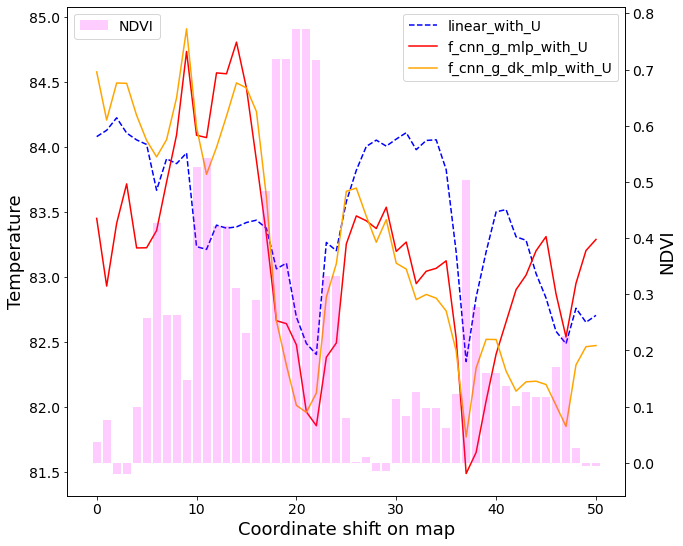

In [34]:
with open('./results_geospatial_real.pkl','rb') as fp:
    res = pkl.load(fp)

model_names = [
    'linear_with_U', 
    'f_cnn_g_mlp_with_U',
    'f_cnn_g_dk_mlp_with_U',
]
colors = ['blue', 'red', 'orange']
ls = ['--', '-', '-']

fig, ax1 = plt.subplots(1, 1, figsize=(10,9))
ax2 = ax1.twinx()
x_coord = np.linspace(0, 50, 51)
for i in range(len(model_names)):
    ax1.plot(x_coord, res[model_names[i]][50,50:], color=colors[i], ls=ls[i], label=model_names[i])
ax2.bar(x_coord, grid[50,50:], color='magenta', alpha=0.2, label='NDVI')
ax1.tick_params(axis='both', which='major', labelsize=14)
ax2.tick_params(axis='both', which='major', labelsize=14)
ax1.legend(loc=1, prop={'size':14})
ax2.legend(loc=2, prop={'size':14})
ax1.set_xlabel('Coordinate shift on map', fontsize=18)
ax1.set_ylabel('Temperature', fontsize=18)
ax2.set_ylabel('NDVI', fontsize=18)
plt.savefig("./visualization_with_U.pdf", dpi=300)